In [1]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('data/CC GENERAL.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [5]:
df.isnull().sum().sum()

314

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
values = {'CREDIT_LIMIT': df['CREDIT_LIMIT'].mean(), 'MINIMUM_PAYMENTS': df['MINIMUM_PAYMENTS'].mean()}
df = df.fillna(values)

In [9]:
df['MINIMUM_PAYMENTS'].mean()

864.2065423050827

In [10]:
df = df.drop('CUST_ID', axis=1)

In [11]:
from sklearn import preprocessing

In [12]:
X = df.values
sc = preprocessing.StandardScaler()
X_sc = sc.fit_transform(X)

In [13]:
X_sc[0][0]

-0.7319893664465486

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packa

<Axes: xlabel='cluster', ylabel='silhouette'>

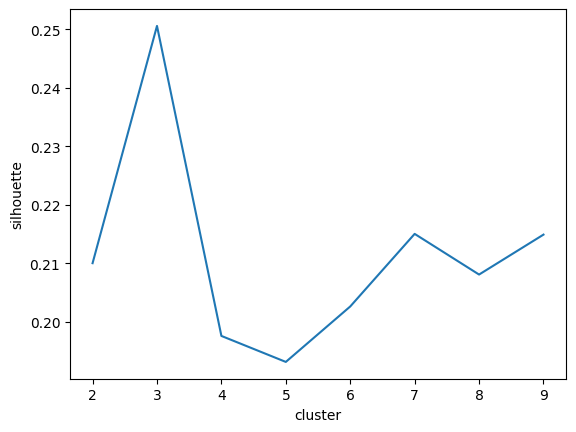

In [16]:
def get_silhouette (cluster_num, X):
    k_means = KMeans(n_clusters=cluster_num, random_state=42)
    k_means.fit(X)
    silhouette = silhouette_score(X, k_means.predict(X))
    return silhouette

silhouette_res = {'silhouette':[], 'cluster':[]}
for cluster_num in range(2,10):
    silhouette_res['silhouette'].append(get_silhouette(cluster_num, X_sc))
    silhouette_res['cluster'].append(cluster_num)
silhouette_df = pd.DataFrame(silhouette_res)
sns.lineplot(data=silhouette_df, x='cluster', y='silhouette', markers='o')

In [18]:
k_means = KMeans(n_clusters=3, random_state=42)
k_means.fit(X_sc)
predict_km = k_means.predict(X_sc)
np.unique(predict_km, return_counts=True)

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


(array([0, 1, 2]), array([1596, 1235, 6119], dtype=int64))

In [19]:
from sklearn.cluster import DBSCAN

In [21]:
ds = DBSCAN()
ds.fit(X_sc)
clusters = ds.labels_
len(set(clusters)) - (1 if -1 in clusters else 0)

38

In [24]:
siliuette_list_dbscan = []
for eps in np.arange(0.1,3,0.2):
    for min_sample in range(1,20,4):
        ds = DBSCAN(eps=eps, min_samples=min_sample)
        ds.fit(X_sc)
        sil_score = silhouette_score(X_sc, ds.labels_, metric='euclidean')
        siliuette_list_dbscan.append((eps, min_sample, sil_score, len(set(ds.labels_))) )
df_dbscan = pd.DataFrame(siliuette_list_dbscan, columns=['eps', 'min_samples', 'sil_score', 'number_of_clusters'])
df_dbscan.sort_values(by = 'sil_score')        

,eps,min_samples,sil_score,number_of_clusters
11,0.5,5,-0.443701,39
16,0.7,5,-0.438837,29
6,0.3,5,-0.424475,42
7,0.3,9,-0.404209,15
30,1.3,1,-0.399305,1536
...,...,...,...,...
74,2.9,17,0.591924,2
66,2.7,5,0.592182,2
73,2.9,13,0.595399,2
72,2.9,9,0.603811,2


In [25]:
from sklearn.cluster import AgglomerativeClustering

In [30]:
siliuette_list_aggcl = []
for num_clust in range (3,10):
    agg_cl = AgglomerativeClustering(affinity='euclidean',n_clusters=num_clust).fit_predict(X_sc)
    sil_score = silhouette_score(X_sc, agg_cl, metric='euclidean')
    siliuette_list_aggcl.append((num_clust, sil_score, len(set(agg_cl))))
df_agg = pd.DataFrame(siliuette_list_aggcl, columns=['cluster_num', 'sil_score', 'number_of_clusters'])
df_agg.sort_values(by = 'sil_score')   

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
c:\U

,cluster_num,sil_score,number_of_clusters
5,8,0.152035,8
6,9,0.153719,9
1,4,0.154709,4
4,7,0.156415,7
2,5,0.158069,5
0,3,0.173110,3
3,6,0.173356,6


In [32]:
agg_cl = AgglomerativeClustering(n_clusters=3, affinity='euclidean').fit(X_sc)
df['cluster_id'] = agg_cl.labels_
df['cluster_id'].value_counts()

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


cluster_id
1    4668
0    3418
2     864
Name: count, dtype: int64

In [33]:
np.unique(agg_cl.fit_predict(X_sc), return_counts=True)

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


(array([0, 1, 2], dtype=int64), array([3418, 4668,  864], dtype=int64))

In [35]:
import matplotlib.pyplot as plt

c:\Users\Настенька\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


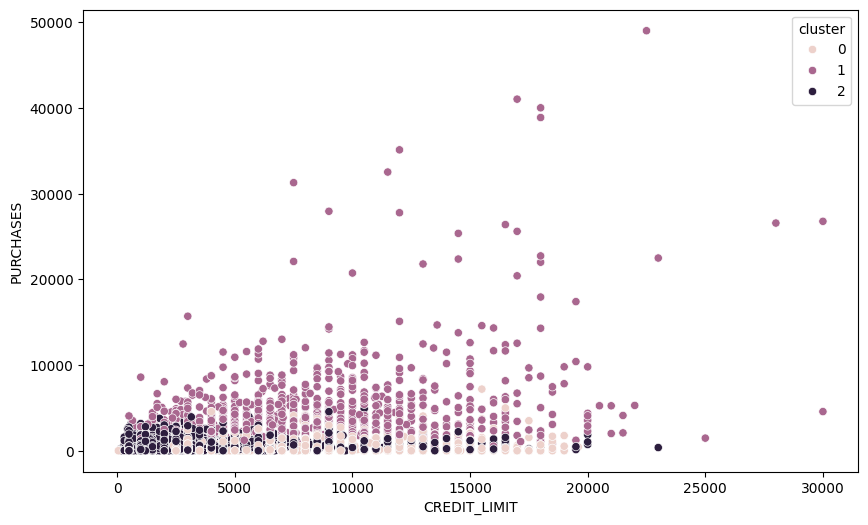

In [36]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_sc)
df['cluster'] = kmeans.labels_
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='CREDIT_LIMIT', y='PURCHASES', hue='cluster')
plt.show()